# Resolución Modelo de Examen

## Ejercicio 1:

In [174]:
import pandas as pd

df = pd.read_csv("datasets_calificaciones.csv")

## Ejercicio 2

In [175]:
# Primeras filas del dataset

print("-"*50)
print("Las primeras filas son:")

primeras_filas = df.head()

print(primeras_filas)

# Tipos de datos

print("-"*50)
print("Los tipos de datos de cada columna son:")

tipos_datos = df.dtypes

print(tipos_datos)

# Valores No Nulos

print("-"*50)
print("La cantidad de valores no nulos por columna son:")

valores_no_nulos = df.count()

print(valores_no_nulos)

# Resúmen Estadístico

print("-"*50)
print("Resúmen estadistico de los valores númericos:")

resumen_estadistico = df.describe()

print(resumen_estadistico)



--------------------------------------------------
Las primeras filas son:
        estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
0        ana pérez  matematicas         8       7.5     9        95%
1     carlos lópez       fisica       6.2         7   NaN        88%
2      maría gómez      quimica         9       8.8   9.5       100%
3  pedro rodríguez     historia       7.5         6     7         75
4     laura vargas  matematicas                 9.2   8.5        92%
--------------------------------------------------
Los tipos de datos de cada columna son:
estudiante    object
Materia       object
Parcial 1     object
Parcial 2     object
Final         object
Asistencia    object
dtype: object
--------------------------------------------------
La cantidad de valores no nulos por columna son:
estudiante    100
Materia       100
Parcial 1      95
Parcial 2      90
Final          89
Asistencia    100
dtype: int64
--------------------------------------------------
Resúmen 

## Ejercicio 3

In [176]:
# Normalización de valores Atipicos 

# Las notas faltantes se reemplazan por 0 para evitar inconvenientes

df = df.fillna(0)

# Transforma Parcial 1, Parcial 2 y Final en valores numericos para su resumen estadistico
columnas_numericas = ['Parcial 1', 'Parcial 2', 'Final']

for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Se borra el % para evitar la inconsistencia y facilitar el analisis de la columna Asistencia

# Borra el porcentaje de la columna Asistencia para que pueda ser transformado en valor numerico
df['Asistencia'] = df['Asistencia'].str.replace('%', '')

# Transforma asistencia en valor numerico
df['Asistencia'] = pd.to_numeric(df['Asistencia'], errors='coerce')

# Se capitaliza valores de Estudiante y Materia
df['estudiante'] = df['estudiante'].str.capitalize()

df['Materia'] = df['Materia'].str.capitalize()

df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana pérez,Matematicas,8.0,7.5,9.0,95
1,Carlos lópez,Fisica,6.2,7.0,0.0,88
2,María gómez,Quimica,9.0,8.8,9.5,100
3,Pedro rodríguez,Historia,7.5,6.0,7.0,75
4,Laura vargas,Matematicas,NaN,9.2,8.5,92


## Ejercicio 4

In [177]:
# Se hace el resumen estadistico a el dataset normalizado

resumen_estadistico_normalizado = df.describe()

print(resumen_estadistico_normalizado)

       Parcial 1  Parcial 2      Final  Asistencia
count  93.000000  98.000000  96.000000   100.00000
mean    7.410753   7.031633   6.989583    88.27000
std     2.130394   2.632806   2.770464     8.58217
min     0.000000   0.000000   0.000000    70.00000
25%     6.700000   6.525000   6.475000    81.75000
50%     7.800000   7.500000   7.500000    88.50000
75%     8.900000   8.800000   8.900000    96.00000
max     9.900000   9.900000   9.900000   103.00000


# Ejercicio 5

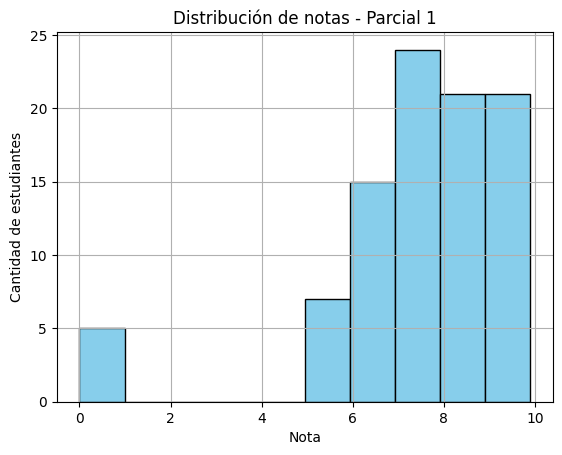

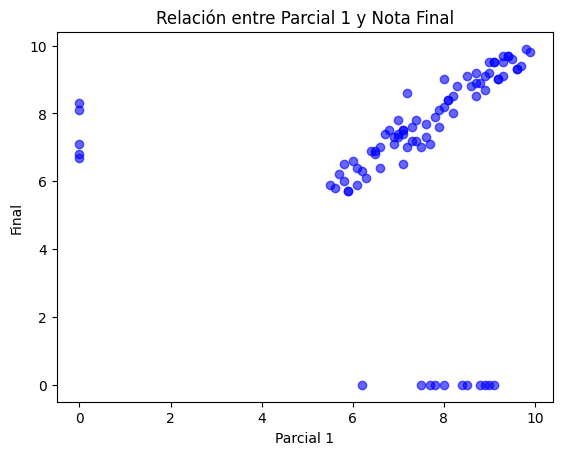

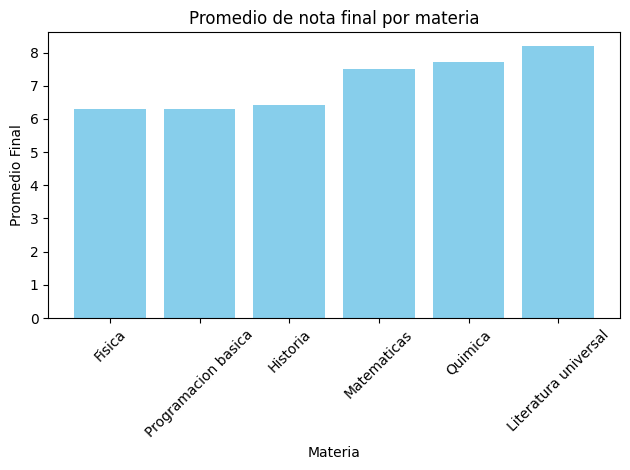

In [178]:
import matplotlib.pyplot as plt

# Historiograma de las notas en general 

plt.hist(df['Parcial 1'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de notas - Parcial 1')
plt.xlabel('Nota')
plt.ylabel('Cantidad de estudiantes')
plt.grid(True)
plt.show()

# Grafico de dispersion entre Parcial 1 y Final

plt.scatter(df["Parcial 1"], df["Final"], color='blue', alpha=0.6)
plt.title("Relación entre Parcial 1 y Nota Final")
plt.xlabel("Parcial 1")
plt.ylabel("Final")
plt.show()

# Grafico de Barra del promedio de la nota final por materia

promedios_final = df.groupby("Materia")["Final"].mean().sort_values()

plt.bar(promedios_final.index, promedios_final.values, color='skyblue')
plt.title("Promedio de nota final por materia")
plt.xlabel("Materia")
plt.ylabel("Promedio Final")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()



## Ejercicio 6

In [179]:
import sqlite3

conexion = sqlite3.connect("notas_estudiantes.db")

df.to_sql("notas", conexion, if_exists="replace", index=False)

conexion.close()